# Data Cleaning

In [66]:
# Import libraries
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [67]:
# Import data
train_df = pd.read_csv('data/fraudTrain.csv')
test_df = pd.read_csv('data/fraudTest.csv')

In [68]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [69]:
# This column holds no significance so it can be dropped off the bat.
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

In [111]:
def datetime_column(df, col_name: str, hour: bool =False, new_col_prefix: str =''):
    '''
    Separates the date into hour (if indicated), weekday, month, and year columns.
    Then deletes the column the times are derived from. 

    :param df: dataframe
    :param col_name: column name containing datetimes
    :param hour: true if date contains a relevant hour
    :param new_col_prefix: prefix that new column names should have 
    '''
    
    # Change values in the column to datetimes
    df[col_name] = pd.to_datetime(df[col_name])

    # If there is a relevant hour included in the datetime, make a new column for the hour
    if hour:
        new_col = new_col_prefix + '_hour'
        df[new_col] = df[col_name].dt.hour
    
    # Always make a new column for weekday, month and year
    # Weekday is the specific day of the week: Monday = 0, Tuesday = 1, etc. 
    df[new_col_prefix + '_weekday'] = df[col_name].dt.weekday
    df[new_col_prefix + '_month'] = df[col_name].dt.strftime("%m")
    df[new_col_prefix + '_year'] = df[col_name].dt.year

    df.drop(col_name, axis=1, inplace=True)

In [85]:
# This function was called on the transation date and date of birth column
datetime_column(train_df, 'trans_date_trans_time', True, 'trans')
datetime_column(test_df, 'trans_date_trans_time', True, 'trans')
datetime_column(train_df, 'dob', new_col_prefix='dob')
datetime_column(test_df, 'dob', new_col_prefix='dob')

In [42]:
train_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_hour', 'trans_day_of_week', 'trans_month', 'trans_year',
       'dob_day', 'dob_month', 'dob_age'],
      dtype='object')

In [78]:
# The columns dropped have been seen to show no significance or were arbitrarily given.
train_df.drop(['merchant', 'first', 'last','street','zip', 'trans_num'], axis=1, inplace=True)
test_df.drop(['merchant', 'first', 'last','street','zip', 'trans_num'], axis=1, inplace=True)

In [44]:
train_df.dtypes

cc_num                 int64
category              object
amt                  float64
gender                object
city                  object
state                 object
lat                  float64
long                 float64
city_pop               int64
job                   object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
trans_hour             int64
trans_day_of_week      int64
trans_month           object
trans_year             int64
dob_day                int64
dob_month             object
dob_age                int64
dtype: object

In [79]:
# Each categorical column was factorized so that it can be more easily evaluated
categorical_column_names = ['gender', 'city', 'state', 'job', 'category']

for cat_name in categorical_column_names:
    # The factorize method assigns a number to each unique term in a specific column
    train_df[cat_name] = pd.factorize(train_df[cat_name])[0]
    test_df[cat_name] = pd.factorize(test_df[cat_name])[0]

In [46]:
train_df.head()

,cc_num,category,amt,gender,city,state,lat,long,city_pop,job,...,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_month,trans_year,dob_day,dob_month,dob_age
0,2703186189652095,0,4.97,0,0,0,36.0788,-81.1781,3495,0,...,36.011293,-82.048315,0,0,1,01,2019,2,03,1988
1,630423337322,1,107.23,0,1,1,48.8878,-118.2105,149,1,...,49.159047,-118.186462,0,0,1,01,2019,2,06,1978
2,38859492057661,2,220.11,1,2,2,42.1808,-112.2620,4154,2,...,43.150704,-112.154481,0,0,1,01,2019,4,01,1962
3,3534093764340240,3,45.00,1,3,3,46.2306,-112.1138,1939,3,...,47.034331,-112.561071,0,0,1,01,2019,3,01,1967
4,375534208663984,4,41.96,1,4,4,38.4207,-79.4629,99,4,...,38.674999,-78.632459,0,0,1,01,2019,4,03,1986


In [93]:
# Seperate training and testing X and y variables
train_y = train_df['is_fraud']
train_X = train_df.drop('is_fraud', axis=1)

test_y = test_df['is_fraud']
test_X = test_df.drop(['is_fraud'], axis=1)

In [94]:
selector = RFE(DecisionTreeClassifier(), n_features_to_select=10, step=1)
selector.fit(train_X, train_y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [95]:
selected_features = []
for i, feature_selection in enumerate(selector.support_):
    if feature_selection:
        selected_features += [train_X.columns[i]]
        print(train_X.columns[i])

category
amt
gender
city
city_pop
unix_time
merch_lat
merch_long
trans_hour
dob_year


# Machine Learning Algorithm Application

In [180]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [96]:
train_selected = train_X[selected_features]
test_selected = test_X[selected_features]

In [197]:
def decision_tree(X_train, y_train, X_test, y_test, random_state: int = 3000):
    clf = DecisionTreeClassifier(random_state=random_state)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    print('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test,
                                    y_pred))
    
    return y_pred

    # #get the confusion matrix
    # confusion_matrix = metrics.confusion_matrix(test_y,  
    #                                             y_pred)
    # matrix_df = pd.DataFrame(confusion_matrix)
    # sns.heatmap(matrix_df, annot=True)

In [184]:
decision_tree(train_X, train_y, test_X, test_y)

accuracy: 0.8933723698487905
              precision    recall  f1-score   support

           0       1.00      0.90      0.94    553574
           1       0.01      0.27      0.02      2145

    accuracy                           0.89    555719
   macro avg       0.50      0.58      0.48    555719
weighted avg       0.99      0.89      0.94    555719



In [185]:
def logistic_regression(X_train, y_train, X_test, y_test, random_state: int = 3000):
    clf = LogisticRegression(random_state=random_state).fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("accuracy: ", metrics.accuracy_score(y_test, y_pred))


In [186]:
logistic_regression(train_X, train_y, test_X, test_y)

/Users/emilychen/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.9961401355721147


## Resampling methods 

This project used undersampling, as there was such an imbalance between the fraud and not fraud class. 

In [139]:
class_count_0, class_count_1 = train_df['is_fraud'].value_counts()

In [137]:
class_0 = train_df[train_df['is_fraud'] == 0]
class_1 = train_df[train_df['is_fraud'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1289169, 21)
class 1: (7506, 21)


total class of 1 and0: 0    7506
1    7506
Name: is_fraud, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

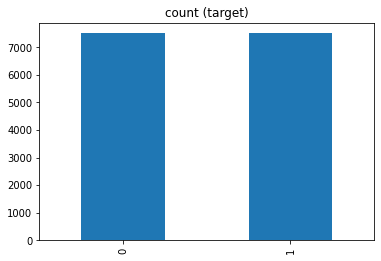

In [142]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['is_fraud'].value_counts())# plot the count after under-sampeling
test_under['is_fraud'].value_counts().plot(kind='bar', title='count (target)')

In [171]:
test_under['is_fraud'].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

In [172]:
undersampled_trainX = test_under.drop('is_fraud', axis =1)
undersampled_trainy = test_under['is_fraud']

In [173]:
test_under['is_fraud'].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

In [202]:
y_pred = decision_tree(undersampled_trainX, undersampled_trainy, test_X, test_y)

accuracy: 0.9086822656774377
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.01      0.12      0.01      2145

    accuracy                           0.91    555719
   macro avg       0.50      0.51      0.48    555719
weighted avg       0.99      0.91      0.95    555719



In [203]:
sum(y_pred)

49098

In [204]:
sum(test_y)

2145

In [188]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

total class of 1 and 0: 1    1289169
0    1289169
Name: is_fraud, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

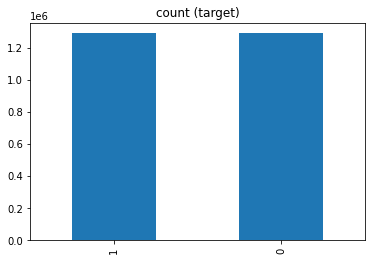

In [194]:
print("total class of 1 and 0:",test_over['is_fraud'].value_counts())# plot the count after under-sampeling
test_over['is_fraud'].value_counts().plot(kind='bar', title='count (target)')

In [195]:
oversampled_trainX = test_over.drop('is_fraud', axis =1)
oversampled_trainy = test_over['is_fraud']

In [199]:
y_pred = decision_tree(oversampled_trainX, oversampled_trainy, test_X, test_y)

accuracy: 0.9788580199705247
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.01      0.06      0.02      2145

    accuracy                           0.98    555719
   macro avg       0.50      0.52      0.51    555719
weighted avg       0.99      0.98      0.99    555719



In [200]:
sum(y_pred)

9858

In [201]:
sum(test_y)

2145